# Performing GMM
Now that we have our dataset, we can now perform GMM to cluster stocks based on the technical indicators.

In [13]:
tickers = ["AMZN", "TSLA", "BABA", "HD", "TM", "NKE", "MCD", "LOW", "SBUX", "JD", "PDD", "BKNG", "GM", "MELI", "TJX", "NIO", "F", "LULU", "HMC", "CMG"]

In [14]:
import sys
import os

!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas

In [15]:
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from IPython.display import display, HTML

%matplotlib inline


We will first perform GMM on each stock individually based on its technical indicators, with the covariance type as full

Clustering stocks using GMM


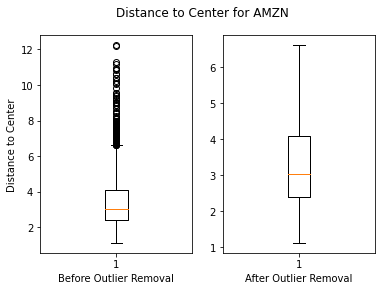

AMZN has 312 outliers out of 2417 points (12.91%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,43.830883,45.636650,0.025737,-8.954574e+05,2.545481,1.006005,1.022957,1.000649,0.460449,-68.030954,-0.009660,-0.013509,-0.032498,0.060314,0.152494
1,57.185733,54.593166,0.020101,7.574810e+05,1.944665,0.997553,0.985826,0.946302,0.101029,-36.110653,0.009772,0.007562,0.031825,0.129363,0.486936
2,60.406116,56.784831,0.024647,1.272339e+06,2.277578,0.992753,0.974849,0.915585,0.421735,-27.515201,0.014258,0.018012,0.051968,0.197978,0.360570


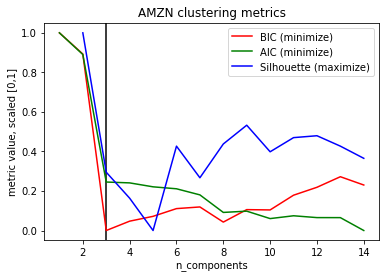

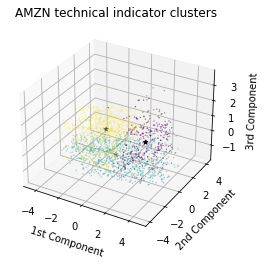

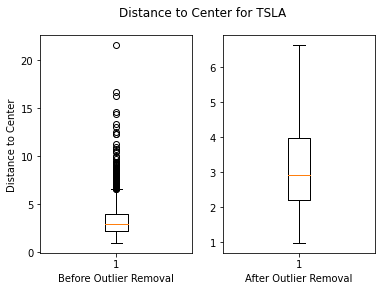

TSLA has 333 outliers out of 2417 points (13.78%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,54.668037,48.892909,0.043682,-5.363296e+06,4.071596,0.991773,0.977648,0.971779,0.668004,-44.431012,0.010992,0.019487,0.050551,0.044920,0.119482
1,45.205030,47.322800,0.041808,-2.162512e+06,4.050001,1.009680,1.032579,1.026901,0.084665,-62.315814,-0.014158,-0.020055,-0.043145,0.082233,0.434741
2,61.547799,56.897722,0.040494,1.224196e+07,3.794423,0.986379,0.949012,0.876480,0.080450,-25.380814,0.027601,0.036717,0.110706,0.392783,0.445777


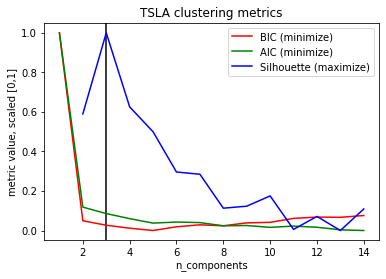

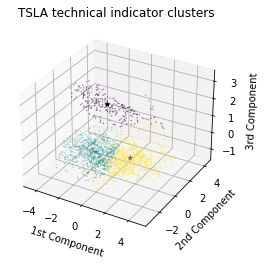

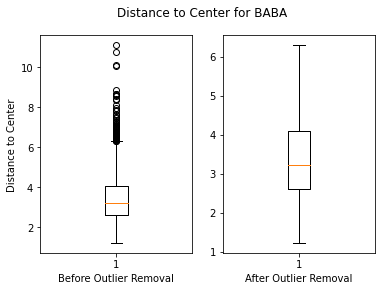

BABA has 244 outliers out of 1702 points (14.34%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,49.353854,51.808278,0.037621,1.642874e+06,3.279256,0.992488,0.998783,1.044091,0.407688,-41.868061,-0.014566,0.016871,-0.015795,-0.028901,0.228395
1,57.747860,53.577807,0.020083,1.922696e+06,2.343732,0.991371,0.972895,0.986141,1.278412,-29.022457,0.012594,0.020565,0.050849,0.000010,0.213306
2,40.953782,42.239702,0.029128,-6.873255e+06,2.864424,1.013738,1.036291,1.055620,0.764664,-74.295277,-0.013345,-0.029027,-0.050464,-0.031078,0.202332
3,54.674991,50.867422,0.026392,1.602674e+06,2.476313,1.007845,0.997068,0.913105,0.435683,-49.092776,0.018382,-0.013558,0.037086,0.214264,0.111111
4,63.340184,58.225504,0.027323,7.896554e+06,2.481161,0.993303,0.963079,0.879441,0.392787,-22.793948,0.026955,0.018398,0.083347,0.243198,0.244856


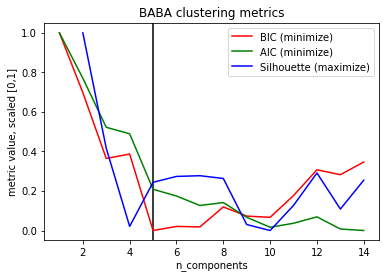

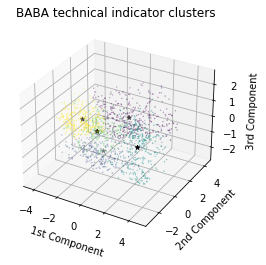

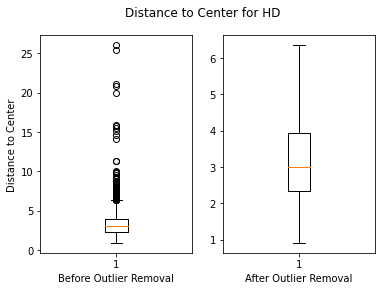

HD has 303 outliers out of 2417 points (12.54%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,63.699241,5.974350,0.018237,-1.866374e+08,9.008342,0.991562,0.973366,0.934189,0.232581,-134.722632,0.013206,0.019949,0.049112,0.123212,0.333491
1,56.624884,-0.332974,0.015530,-5.278138e+08,18.865533,0.998577,0.990962,0.950424,0.513058,-323.959429,0.007761,0.004368,0.022931,0.115052,0.395459
2,47.219617,1.543980,0.017643,-1.840130e+08,9.466135,1.004128,1.010552,0.986967,0.240552,-199.782434,-0.002905,-0.008655,-0.013041,0.063235,0.271050


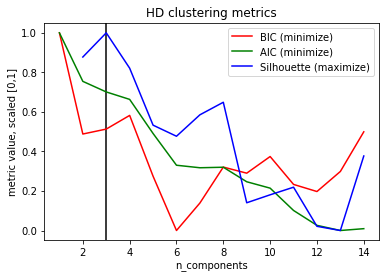

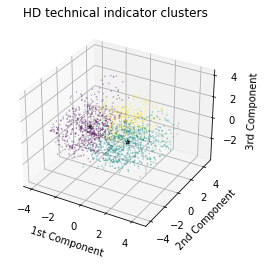

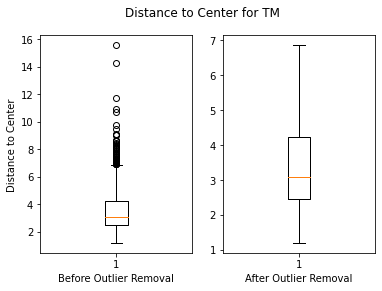

TM has 302 outliers out of 2417 points (12.49%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,56.876125,8.419410,0.016130,-2.032384e+07,7.834220,0.998756,0.987595,0.953048,0.560410,-159.104985,0.010673,0.004342,0.030652,0.101626,0.120567
1,50.763905,48.309507,0.016946,9.148263e+05,1.003988,0.999312,1.000361,0.998442,0.464180,-42.497630,-0.001318,0.001613,-0.000978,0.014592,0.103546
2,42.175722,-17.414165,0.019203,-2.781004e+07,10.466074,1.003850,1.015704,1.026590,0.636190,-237.526563,-0.007926,-0.009321,-0.025749,-0.008510,0.051537
3,67.363820,37.565748,0.013711,-9.829878e+06,4.277648,0.995180,0.967974,0.902355,0.478249,-72.274779,0.023493,0.013966,0.069714,0.174486,0.014657
4,47.943190,-5.648406,0.018531,-2.408555e+07,9.185757,1.000140,1.003838,1.004033,0.606881,-198.971098,-0.002698,-0.000669,-0.006257,0.020503,0.065248


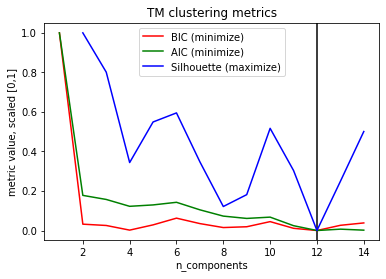

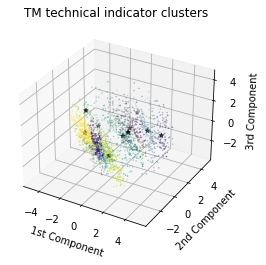

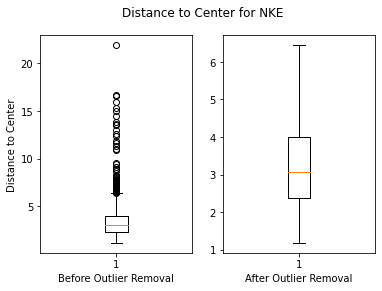

NKE has 301 outliers out of 2417 points (12.45%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,57.077975,-7.445092,0.019855,-4.424690e+08,12.893634,0.983631,0.977397,1.012078,0.978082,-206.415891,-0.002928,0.034351,0.019104,-0.040454,0.014650
1,57.641960,2.631466,0.018354,-2.521552e+08,8.149652,0.995800,0.985053,0.952200,0.584166,-145.121639,0.008916,0.010515,0.030963,0.102164,0.131380
2,44.722172,9.856143,0.021119,-6.076673e+07,3.203275,1.008780,1.018664,0.983575,0.175773,-92.463388,-0.003254,-0.018736,-0.020634,0.089115,0.058129
3,57.320069,12.237274,0.020163,-9.863392e+07,4.265443,0.998471,0.987565,0.937054,0.269965,-79.649562,0.010579,0.005091,0.031229,0.141925,0.164934
4,58.547229,-7.481309,0.014525,-3.976173e+08,11.870537,0.998221,0.985095,0.943140,0.879461,-218.230732,0.012922,0.006105,0.037451,0.117415,0.043951


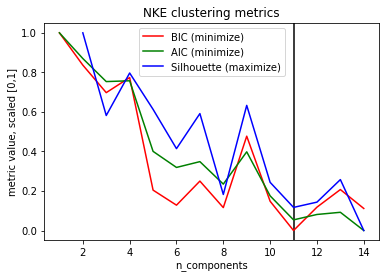

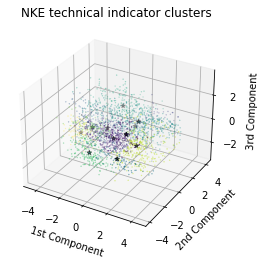

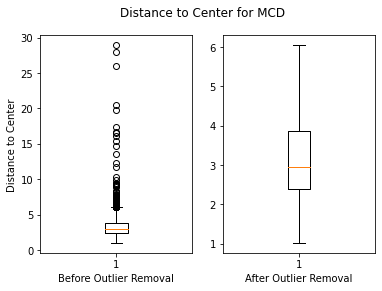

MCD has 307 outliers out of 2417 points (12.7%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,52.014554,-0.611788,0.012292,-6.413518e+08,22.311985,1.001159,0.999699,0.985585,1.049230,-470.538515,0.002689,-0.001934,0.005536,0.040448,0.106161
1,49.896963,3.363631,0.016186,5.410404e+06,3.158849,0.999332,1.001619,0.993007,0.363653,-69.575808,-0.001899,0.001447,-0.003690,0.034673,0.090521
2,48.758696,-1.281582,0.012670,-8.489993e+08,28.312729,0.996966,0.999942,1.029176,1.296917,-564.473815,-0.004964,0.005782,-0.006702,-0.059223,0.038863
3,57.444363,1.754331,0.012850,-2.360415e+08,10.439644,1.003238,0.995395,0.935595,0.591921,-248.323116,0.010922,-0.005041,0.022621,0.148839,0.132701
4,44.277534,0.469304,0.015154,-4.042253e+08,15.224020,0.999915,1.008299,1.031198,0.815528,-310.521645,-0.007922,-0.000765,-0.019621,-0.042695,0.053081


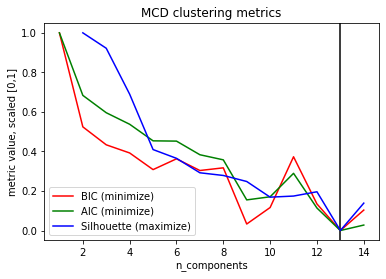

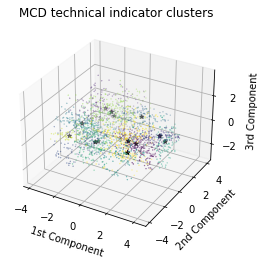

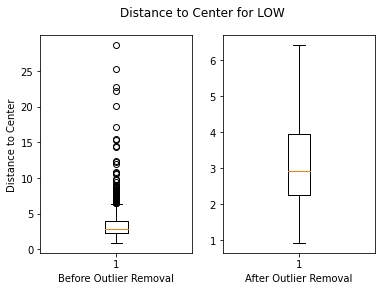

LOW has 308 outliers out of 2417 points (12.74%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,44.825619,-0.489317,0.021152,-2.218816e+08,10.682300,1.003744,1.016919,1.014759,0.366524,-194.495501,-0.009644,-0.008861,-0.028838,0.027134,0.309151
1,59.579486,0.719127,0.018880,-3.709790e+08,14.415937,0.997219,0.981563,0.926494,0.515175,-221.212822,0.015247,0.008320,0.045768,0.155011,0.336178
2,59.456690,8.797257,0.020806,-8.888709e+07,5.961330,0.994414,0.978724,0.939309,0.203041,-88.429530,0.012053,0.014249,0.043380,0.119266,0.354670


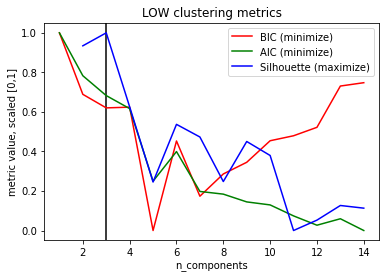

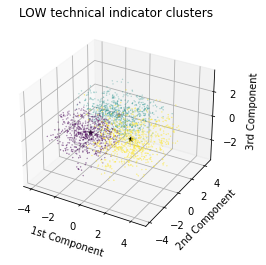

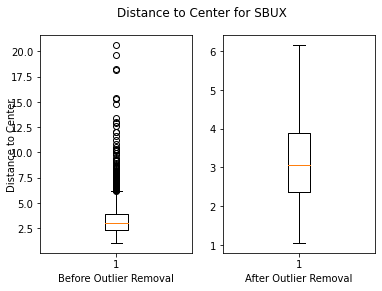

SBUX has 328 outliers out of 2417 points (13.57%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,47.857140,0.306324,0.017966,-4.328731e+08,11.622197,1.000211,1.005625,1.007558,0.481036,-213.067489,-0.004734,-0.000814,-0.011459,0.004444,0.415989
1,60.974994,1.086745,0.017210,-5.362174e+08,14.272606,0.996781,0.980500,0.926344,0.586236,-231.699755,0.015564,0.009066,0.046166,0.158135,0.287697
2,57.249956,6.023797,0.017779,-1.524007e+08,5.430201,0.997721,0.988328,0.944251,0.246207,-97.167198,0.008367,0.006664,0.026560,0.128224,0.296314


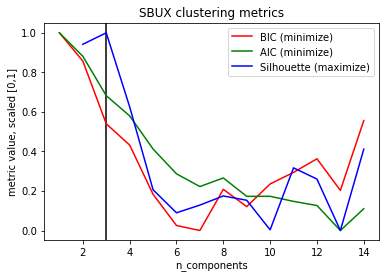

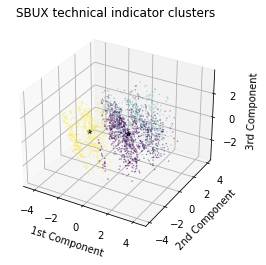

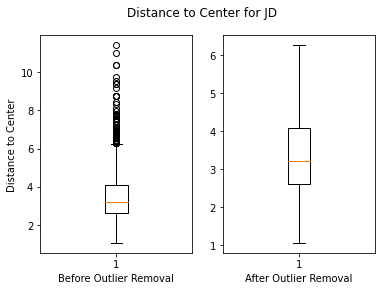

JD has 259 outliers out of 1785 points (14.51%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,51.232446,48.063610,0.031453,-9.121634e+05,3.442137,1.011158,1.008224,0.940632,0.785506,-59.600293,0.013187,-0.020865,0.021790,0.185518,0.196592
1,62.151854,58.491950,0.037656,6.269958e+06,3.409632,0.987214,0.955597,0.871964,0.518288,-24.276250,0.021378,0.033538,0.082404,0.281882,0.189384
2,52.124218,53.119357,0.042474,1.306851e+06,4.020910,0.984156,0.984854,1.046072,0.906247,-34.585480,-0.013086,0.034247,-0.000977,-0.047901,0.184142
3,39.972732,43.987192,0.039330,-3.843823e+06,4.114777,1.012923,1.045311,1.084664,0.728404,-74.750496,-0.021831,-0.029202,-0.070093,-0.038120,0.224115
4,62.561781,52.288306,0.026232,2.260015e+05,3.063304,0.991997,0.957394,0.900886,1.399607,-30.000198,0.031608,0.021332,0.098963,0.147586,0.205767


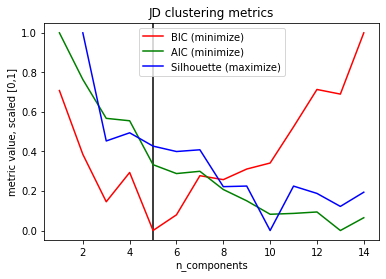

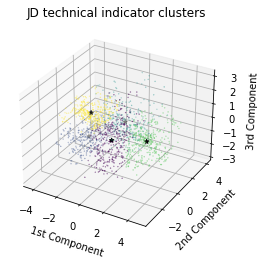

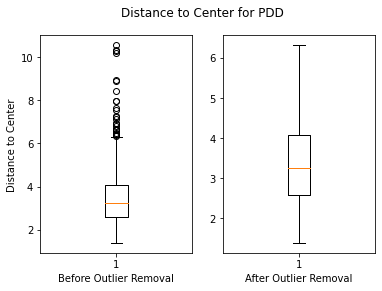

PDD has 95 outliers out of 733 points (12.96%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,54.616905,53.678610,0.046254,1.571713e+06,4.835015,0.984785,0.967125,0.999043,0.511088,-34.888672,0.003070,0.038849,0.055667,0.077769,0.393417
1,41.564274,44.785297,0.050279,-2.412554e+06,5.620825,1.016753,1.060434,1.105395,0.376059,-72.502523,-0.030717,-0.035636,-0.095447,0.085034,0.322884
2,60.677712,49.243689,0.060021,-2.664113e+05,5.683058,0.997618,0.944231,0.699584,0.203701,-39.980782,0.059657,0.016070,0.190221,0.985045,0.283699


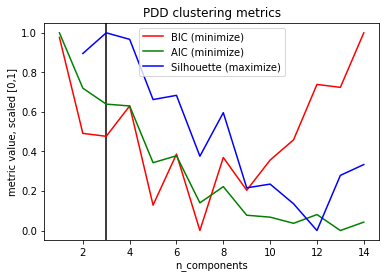

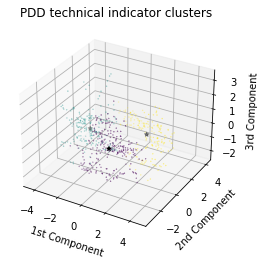

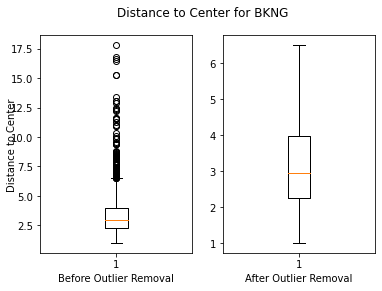

BKNG has 306 outliers out of 2417 points (12.66%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,63.421259,57.478518,0.019862,168229.455906,1.951304,0.990403,0.966525,0.924520,0.209012,-18.133261,0.016265,0.024234,0.060173,0.134327,0.134533
1,50.073214,45.102264,0.022129,-174497.373382,2.130116,1.010246,1.008897,0.958309,0.305875,-63.178460,0.012968,-0.020823,0.018276,0.113138,0.096637
2,64.444072,56.143162,0.022227,143593.997154,2.055545,0.995960,0.965490,0.893666,0.449342,-26.458349,0.028395,0.013705,0.081987,0.217157,0.043108
3,45.296426,46.484935,0.029757,-77784.806968,2.539581,1.005139,1.016698,0.997403,0.664741,-66.477655,-0.005051,-0.011946,-0.020399,0.073093,0.037897
4,37.247614,41.990711,0.025690,-232722.924587,2.390333,1.006971,1.039651,1.061739,0.247668,-75.575066,-0.024629,-0.019240,-0.073647,-0.073239,0.061108


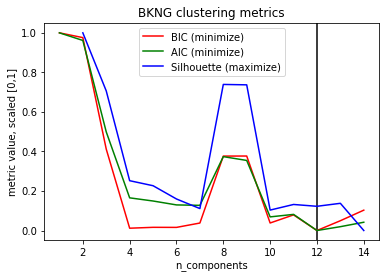

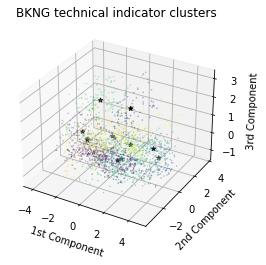

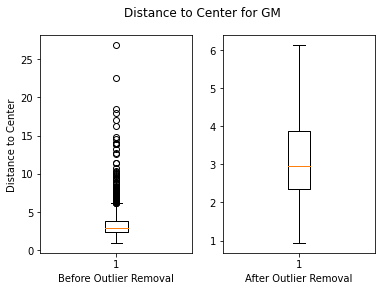

GM has 304 outliers out of 2417 points (12.58%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,52.006034,-0.515913,0.023512,-9.986022e+08,24.456777,0.998626,0.995721,0.983129,0.757437,-276.542033,0.002396,0.004312,0.012093,0.054358,0.628017
1,49.759479,13.207323,0.026451,-1.973767e+08,7.764679,1.001316,1.003865,0.992934,0.586126,-104.135505,-0.000894,-0.002016,-0.000072,0.051326,0.371983


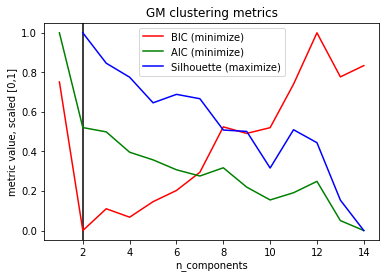

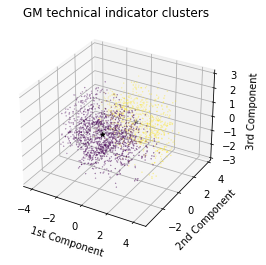

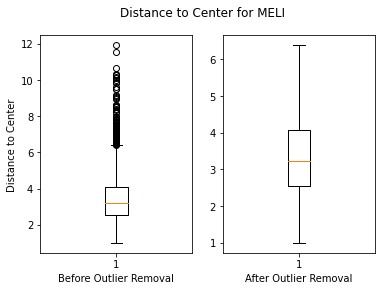

MELI has 322 outliers out of 2417 points (13.32%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,45.813617,15.886598,0.033394,-2.219510e+06,4.158134,0.996031,1.017159,1.093386,0.798011,-69.167385,-0.024314,0.005987,-0.049685,-0.134154,0.081146
1,61.812863,58.175424,0.037946,3.277521e+05,3.624399,0.980339,0.949664,0.924135,0.146373,-17.394644,0.014636,0.048077,0.084166,0.185335,0.119809
2,37.831031,40.388389,0.043104,-1.760658e+05,4.182103,1.016495,1.059430,1.051678,0.146569,-79.799206,-0.032985,-0.034794,-0.102651,0.103653,0.103580
3,58.762859,4.123054,0.021777,-3.249577e+06,3.670981,0.988883,0.968422,0.988956,1.121859,-56.134904,0.016074,0.023220,0.064564,-0.045140,0.068735
4,61.811192,34.917754,0.028709,-1.118866e+06,3.457064,0.991668,0.959430,0.896527,0.514610,-38.303033,0.028296,0.022433,0.096385,0.207151,0.143198


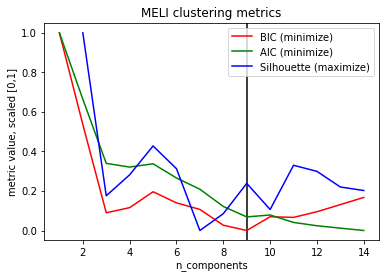

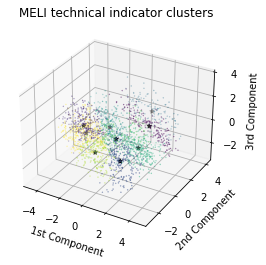

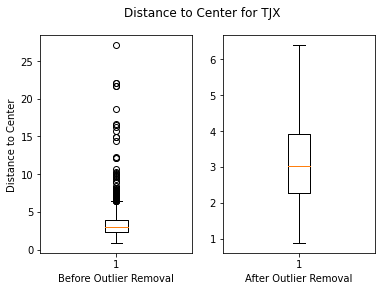

TJX has 260 outliers out of 2417 points (10.76%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,54.784800,8.969475,0.020303,-5.538512e+07,3.819975,0.998997,0.992577,0.959061,0.253507,-78.085013,0.006396,0.003324,0.019120,0.087951,0.318498
1,44.070875,-0.964555,0.019257,-3.177955e+08,10.059995,1.002320,1.014444,1.027113,0.528229,-210.863114,-0.010277,-0.005589,-0.029158,-0.031155,0.092258
2,50.978137,2.699077,0.018893,-2.435885e+08,8.345017,0.999322,0.999848,0.987467,0.451270,-165.759093,-0.000424,0.001773,0.000865,0.038880,0.286509
3,57.837751,-1.633974,0.015113,-3.962053e+08,12.221335,0.998035,0.986863,0.943589,0.614489,-229.019564,0.011002,0.005611,0.032043,0.129278,0.241076
4,59.339649,6.697252,0.018336,-1.748569e+08,6.772206,0.995056,0.981745,0.942156,0.380241,-118.776016,0.010854,0.011918,0.036486,0.117745,0.061660


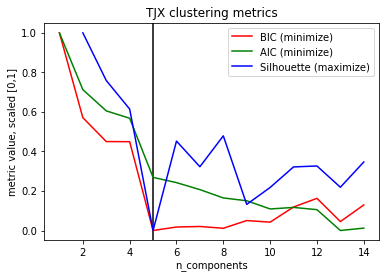

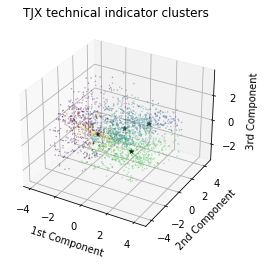

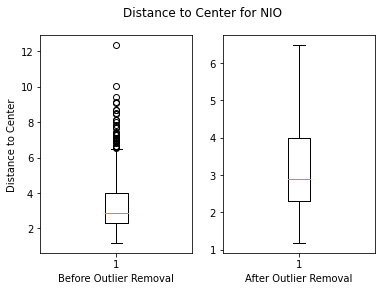

NIO has 109 outliers out of 700 points (15.57%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,39.832005,42.911003,0.061835,-2.166626e+07,7.399390,1.021910,1.085826,1.278218,2.308078,-70.984518,-0.059109,-0.046583,-0.160310,-0.179107,0.226734
1,58.143951,54.242799,0.070878,4.011567e+07,7.482644,1.016489,0.967962,0.578701,-0.349495,-48.019907,0.077093,-0.019979,0.235942,2.389664,0.157360
2,56.296637,53.095414,0.083784,1.110532e+07,7.808730,0.969481,0.920770,1.079615,3.610607,-33.502377,0.018294,0.083616,0.188105,0.119755,0.121827
3,49.654340,48.268110,0.096246,1.805615e+06,9.802035,1.008597,0.991877,1.088540,4.532317,-56.632336,0.013881,0.001951,0.126798,0.317913,0.174281
4,51.835552,51.108828,0.049504,7.012075e+06,5.249367,0.983185,0.983973,1.039899,0.246731,-41.710987,-0.013661,0.037642,0.011755,0.490735,0.238579


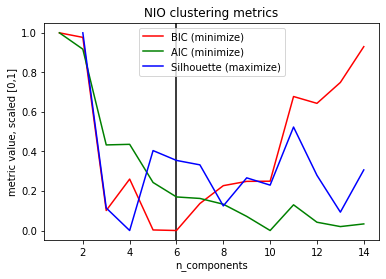

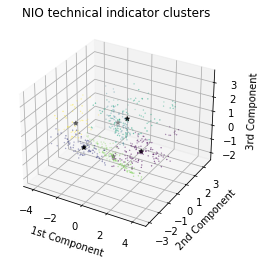

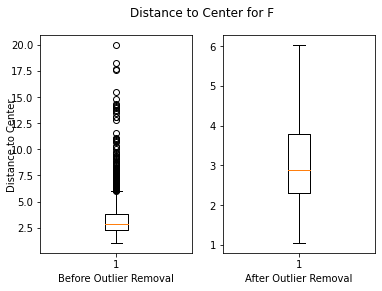

F has 369 outliers out of 2417 points (15.27%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,48.419452,-1.706092,0.020562,-3.654475e+09,35.686612,1.002556,1.006093,1.007116,0.922570,-417.574765,-0.001857,-0.004686,-0.005601,0.016692,0.375977
1,51.507503,14.890047,0.025344,-6.928280e+08,7.308603,0.996569,0.997502,0.990798,1.679178,-84.818568,-0.002101,0.007450,0.004203,0.042213,0.137207
2,60.684442,3.844857,0.020549,-3.096272e+09,29.838554,0.990363,0.970834,0.950573,1.041982,-331.473421,0.013126,0.022811,0.051156,0.074999,0.255371
3,35.120371,-1.245182,0.023699,-2.640968e+09,26.949590,1.008213,1.040648,1.094245,1.215111,-319.178046,-0.026943,-0.020187,-0.076665,-0.100517,0.136719
4,51.079619,22.957214,0.026008,7.686704e+07,-0.658800,1.006717,1.005682,0.943864,1.869084,-24.520237,0.007944,-0.012306,0.013393,0.150913,0.094727


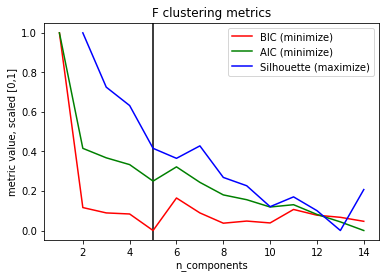

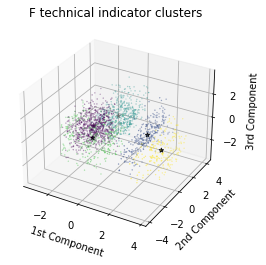

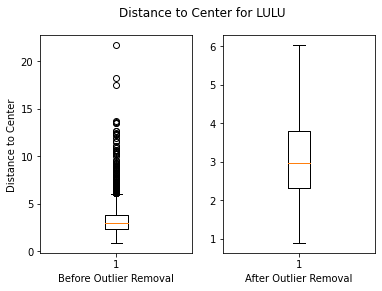

LULU has 370 outliers out of 2417 points (15.31%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,64.170443,58.118606,0.026930,8.942716e+05,2.589747,0.989189,0.961799,0.852337,0.225163,-20.839814,0.021414,0.027471,0.077467,0.334235,0.184660
1,50.985444,48.227982,0.026019,-1.877501e+05,2.818062,1.007456,1.001680,0.986336,1.122867,-56.071038,0.012253,-0.013910,0.025385,0.048885,0.097704
2,65.786642,59.652113,0.026824,1.002154e+06,2.746622,0.983515,0.943544,0.927205,1.001711,-11.415094,0.027444,0.040061,0.105721,0.097690,0.158769
3,45.932912,49.592527,0.031736,-1.180703e+04,3.304006,0.997126,1.001092,1.124230,1.647738,-50.092623,-0.010034,0.006441,-0.013368,-0.251238,0.087934
4,56.350451,51.786682,0.025924,2.076992e+05,2.666940,1.001916,0.988605,0.912068,0.619756,-44.035932,0.016834,-0.001074,0.045078,0.218271,0.175379


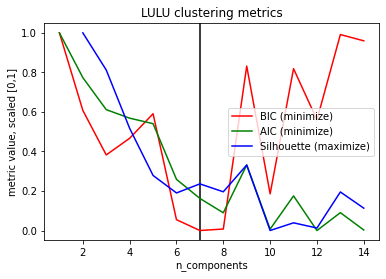

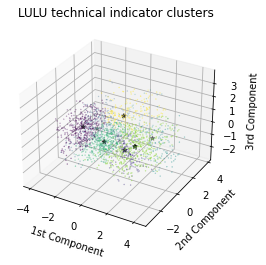

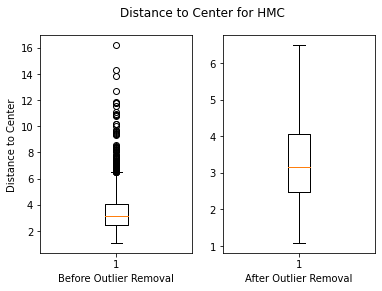

HMC has 293 outliers out of 2417 points (12.12%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,52.395829,37.086087,0.022681,-1.107517e+06,1.738486,0.997134,0.996254,0.974342,0.701169,-48.153180,0.001740,0.004851,0.008569,0.063719,0.166196
1,62.521432,59.461231,0.014852,2.755989e+05,1.355571,0.995291,0.971983,0.937259,1.291030,-20.801497,0.018062,0.013825,0.055980,0.092495,0.154896
2,50.587966,53.150625,0.018026,2.123862e+05,1.490263,0.998581,0.998340,1.010197,1.355970,-43.495286,-0.002016,0.003614,0.000180,-0.011485,0.322976
3,47.219947,46.866189,0.018391,-4.149917e+04,1.501072,1.005877,1.009830,1.003409,1.301071,-61.477950,0.000802,-0.011758,-0.005267,0.017536,0.171375
4,37.164390,41.167183,0.022216,-1.879855e+05,1.674458,1.005000,1.030138,1.075720,1.287940,-75.610183,-0.020648,-0.013568,-0.057943,-0.092119,0.184557


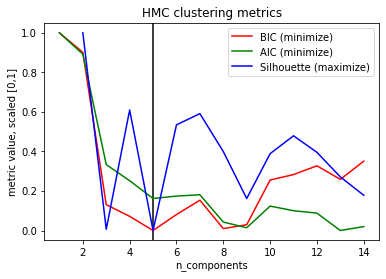

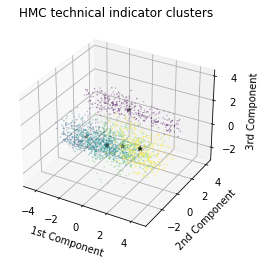

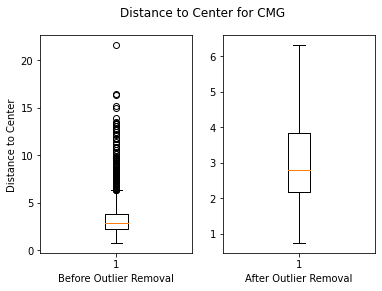

CMG has 351 outliers out of 2417 points (14.52%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,42.905456,43.570161,0.025895,-245572.415672,2.479942,1.007690,1.027692,1.017978,0.432796,-69.336226,-0.012771,-0.017397,-0.042209,0.058171,0.328654
1,61.268317,56.496372,0.023356,196631.995600,2.220256,0.991123,0.971441,0.901806,0.350063,-25.806307,0.013973,0.022089,0.053961,0.228919,0.416263
2,56.556576,52.024054,0.023480,59846.572605,2.466903,0.998268,0.980993,0.975357,0.800271,-38.312706,0.015816,0.006882,0.050250,0.041968,0.255082


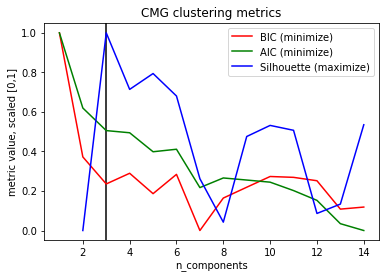

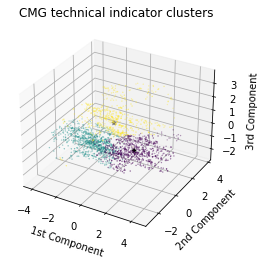

In [19]:

print("Clustering stocks using GMM")
numClusters = []

if not os.path.exists("plots"):
        os.mkdir("plots")


for i in range(len(tickers)):

    # read in data from csv
    data = pd.read_csv(f'./data/{tickers[i]}.csv')

    # generate matrix with technical indicators (features) as columns
    features = data.to_numpy()[:, 6:]

    # normalize each feature
    scaler = StandardScaler()
    X = scaler.fit_transform(features)


    # Remove outliers
    center = np.mean(X, axis=0)
    
    distToCenter = np.linalg.norm(X-center, axis=1)

    #box plot of distance to center
    plt = reload(plt)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Distance to Center for {tickers[i]}')
    ax1.boxplot(distToCenter)
    plt.setp(ax1, xlabel='Before Outlier Removal')
    plt.setp(ax2, xlabel='After Outlier Removal')
    ax2.boxplot(distToCenter, showfliers=False)
    fig.text(0.06, 0.5, 'Distance to Center', ha='center', va='center', rotation='vertical')
    plt.savefig(f"plots/outliers_{tickers[i]}.png")
    plt.show()



    # Calculate IQR
    q75, q25 = np.percentile(distToCenter, [75 ,25])
    
    iqr = q75 - q25

    # Calculate outlier cutoff and remove outliers
    nonOutlierIndices = np.argwhere((distToCenter < q75 + 0.5 * iqr) & (distToCenter > q25 - 1 * iqr)).reshape(-1)
    outlierPercentage = 100 * (len(X) - len(nonOutlierIndices)) / float(len(X))
    print(f'{tickers[i]} has {len(X) - len(nonOutlierIndices)} outliers out of {len(X)} points ({round(outlierPercentage, 2)}%)')
    X = X[nonOutlierIndices]


    # PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    X = pca.fit_transform(X)
    
    # GMM
    n_components = np.arange(1, features.shape[1]+1)
    gmms = [GaussianMixture(n_components=k, covariance_type='full').fit(X) for k in n_components]

    
    # Calculate metrics
    silhouettes = np.array([metrics.silhouette_score(X, gmms[k-1].predict(X)) for k in n_components[1:]])
    bics = np.array([gmm.bic(X) for gmm in gmms])
    aics = np.array([gmm.aic(X) for gmm in gmms])
    
    minidx = min(np.argmin(bics), np.argmin(aics))
    argmaxSil = np.argmax(silhouettes)
    if argmaxSil > 0 and silhouettes[argmaxSil - 1] < silhouettes[argmaxSil]:
        # enforce local maximum (peak) for silhouette
        minidx = min(minidx, argmaxSil + 1)
        
    numClusters.append(minidx + 1)
    
    centroids = gmms[minidx].means_

    # descale centroids
    centroids_descaled = scaler.inverse_transform(pca.inverse_transform(centroids))

    # create df for centroids
    centroids_df = pd.DataFrame(centroids_descaled, columns=data.columns[6:])
    centroids_df['ClusterCoverage%'] = [pair[1] / X.shape[0] for pair in np.asarray(np.unique(gmms[minidx].predict(X), return_counts=True)).T]
    display(centroids_df.head())
    if not os.path.exists("centroids"):
        os.mkdir("centroids")
    centroids_df.to_csv(f'./centroids/{tickers[i]}_centroids.csv')


    # plot the results
    plt = reload(plt)
    fig = plt.figure()
    plt.title(f"{tickers[i]} clustering metrics")
    plt.axvline(x=minidx + 1, color='black')
    plt.plot(n_components, minmax_scale(bics), label='BIC (minimize)', color='r')
    plt.plot(n_components, minmax_scale(aics), label='AIC (minimize)', color='g')
    plt.plot(n_components[1:], minmax_scale(silhouettes), label='Silhouette (maximize)', color='b')
    plt.legend(loc='best')
    plt.xlabel('n_components')
    plt.ylabel('metric value, scaled [0,1]')
    plt.savefig(f"plots/clustering_{tickers[i]}.png")
    plt.show()

    plt = reload(plt)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=0.1, c=gmms[minidx].predict(X), cmap='viridis')
    ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='black')
    ax.set_xlabel("1st Component")
    ax.set_ylabel("2nd Component")
    ax.set_zlabel("3rd Component")
    plt.title(f"{tickers[i]} technical indicator clusters")
    plt.savefig(f"plots/pca{tickers[i]}.png")
    plt.show()

    # plt.plot(n_components[1:], silhouette_avg, label='SC')
    # plt.legend(loc='best')
    # plt.xlabel('n_components')
    # plt.ylabel('Sillhouette Score')
    # plt.show()


number of clusters (raw) [3, 3, 6, 3, 10, 3, 12, 3, 3, 5, 3, 7, 2, 8, 5, 7, 7, 6, 7, 3]
mean: 5.3 , rounds to 5 clusters


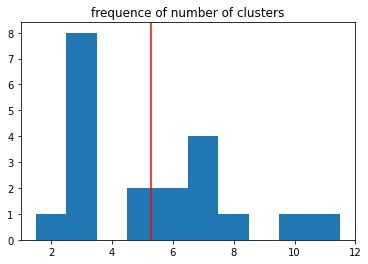

In [17]:
%matplotlib inline

print('number of clusters (raw)', numClusters)
print('mean:', np.mean(numClusters), ', rounds to', int(np.mean(numClusters)), 'clusters')

fig = plt.figure()
plt.hist(numClusters, align='left', bins=np.max(numClusters) - np.min(numClusters))
plt.axvline(x=np.mean(numClusters), c='red')
plt.xlabel="num clusters"
plt.ylabel='freq'
plt.title('frequence of number of clusters')
plt.show()